In [1]:
#imports
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from prepare import titanic_pipeline

<h1 class="alert alert-block alert-success" style="font-size: 20px;"> Methodologies I > Classification > Modeling > Random Forest</h1>  

<h2 class="alert alert-block alert-info" style="font-size: 20px;">1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.</h2>

In [72]:
#Lets use the titanic pipeline to acquire and prepare the data
train, val, test = titanic_pipeline()
#Double check our results
print(train.shape, val.shape, test.shape)
print(train.head())


(623, 9) (134, 9) (134, 9)
     survived     sex   age  sibsp  parch     fare  class  embark_town  alone
748         0    male  19.0      1      0  53.1000  First  Southampton      0
45          0    male  29.0      0      0   8.0500  Third  Southampton      1
28          1  female  29.0      0      0   7.8792  Third   Queenstown      1
633         0    male  29.0      0      0   0.0000  First  Southampton      1
403         0    male  28.0      1      0  15.8500  Third  Southampton      0


In [4]:
#Create X_train (remove the target variable)
X_train = train.drop(columns = ['survived'])
#Create Y_train (only the target variable)
y_train = train.survived

#Create X_val (remove the target variable)
X_val = val.drop(columns = ['survived'])
#Create Y_val (only the target variable)
y_val = val.survived

In [5]:
#Create the dummy columns
X_train = pd.get_dummies(X_train)
X_val = pd.get_dummies(X_val)
#check results
X_train.head()

,age,sibsp,parch,fare,alone,sex_female,sex_male,class_First,class_Second,class_Third,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
748,19.0,1,0,53.1000,0,False,True,True,False,False,False,False,True
45,29.0,0,0,8.0500,1,False,True,False,False,True,False,False,True
28,29.0,0,0,7.8792,1,True,False,False,False,True,False,True,False
633,29.0,0,0,0.0000,1,False,True,True,False,False,False,False,True
403,28.0,1,0,15.8500,0,False,True,False,False,True,False,False,True


In [6]:
#Get the baseline accuracy. Accuracy = Ratio of true predictions to the total number of predictions
(y_train == 0).mean()

0.6163723916532905

In [7]:
#Create the random forest classifiere
seed = 42

rf = RandomForestClassifier(max_depth = 10, random_state = seed)
#train/fit the tandom forest classifier using xtrain
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

<h2 class="alert alert-block alert-info" style="font-size: 20px;">2. Evaluate your results using the model score, confusion matrix, and classification report..</h2>

In [12]:
#Make the predictions!
train_preds = rf.predict(X_train)
train_preds[:10]

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0])

In [8]:
#check the score of the train df. This creates the predictions and checks the correctness in single function.
rf.score(X_train, y_train), rf.score(X_val, y_val)

(0.9534510433386838, 0.8507462686567164)

In [15]:
#Classification report
print(classification_report(y_train, train_preds))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       384
           1       0.98      0.90      0.94       239

    accuracy                           0.95       623
   macro avg       0.96      0.94      0.95       623
weighted avg       0.95      0.95      0.95       623



In [16]:
#Create the confusion matrix from the y_train (catual target variable) and the train predictions
conf_matrix = confusion_matrix(y_train, train_preds)
print(conf_matrix)
#assign a variable to each outcome to be used on later calculations
tn, fp, fn, tp = conf_matrix.ravel()
print(tn, fp, fn, tp)

[[379   5]
 [ 24 215]]
379 5 24 215


<h2 class="alert alert-block alert-info" style="font-size: 20px;">3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.</h2>

In [17]:
#Calculate tpr, fpr, tnr,fnr
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)
tnr = tn / (tn + fp)
fnr = fn / (fn + tp)
#display the rates
print(f"True Positive Rate    {tpr:.4f}")
print(f"False Positive Rate   {fpr:.4f}")
print(f"True Negative Rate    {tnr:.4f}")
print(f"False Negative Rate   {fnr:.4f}")

True Positive Rate    0.8996
False Positive Rate   0.0130
True Negative Rate    0.9870
False Negative Rate   0.1004


<h2 class="alert alert-block alert-info" style="font-size: 20px;">4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.</h2>

In [63]:
#Test a combination of depths and min leaf settings. 
seed = 42
train_acc = []
val_acc = []
depth = []
leaf = []

for max_depth in range(11, 0, -1):  # Decreasing depth from 10 to 1
    for min_samples_leaf in range(1, 6):  # Increasing min_samples_leaf from 1 to 5
        rf = RandomForestClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=seed)
        rf.fit(X_train, y_train)
        
        depth.append(max_depth)
        leaf.append(min_samples_leaf)
        
        train_acc.append(rf.score(X_train, y_train))
        val_acc.append(rf.score(X_val, y_val))


In [74]:
#Print the results
trees = pd.DataFrame({'depth': depth,
                      'train_acc': train_acc,
                      'val_acc': val_acc,
                      'leaf': leaf})

trees.sort_values(by=['val_acc', 'train_acc', 'depth'], ascending=[False, False, True]).head(5)

,depth,train_acc,val_acc,leaf
10,9,0.937400,0.858209,1
1,11,0.913323,0.858209,2
6,10,0.905297,0.858209,2
7,10,0.894061,0.858209,3
2,11,0.886035,0.858209,3


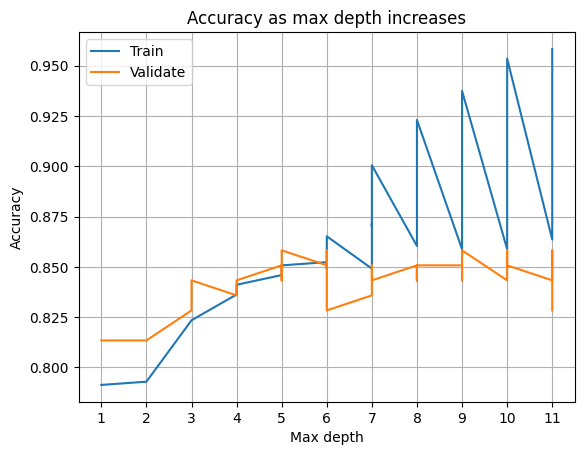

In [77]:
plt.plot(trees.depth, trees.train_acc, label = 'Train')
plt.plot(trees.depth, trees.val_acc, label = 'Validate')
plt.ylabel('Accuracy')
plt.xlabel('Max depth')
plt.title('Accuracy as max depth increases')
plt.legend()
plt.grid(True)
plt.xticks(range(min(trees.depth), max(trees.depth)+1))
plt.show()

<h2 class="alert alert-block alert-info" style="font-size: 20px;">5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?</h2>

<h2 style='background-color: #F5F5F5; padding-left: 40px; padding-top: 10px; padding-bottom: 5px; padding-right: 10px; color: Green; font-size: 18px; box-sizing: border-box;'>Seems like the best combination is depth of 11 and minimum leaf 2.

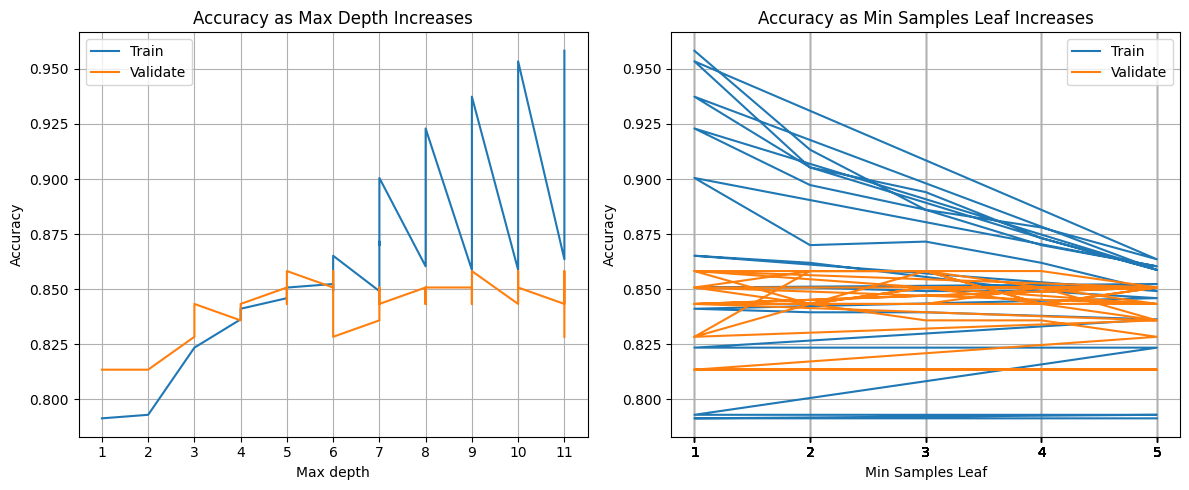

In [79]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot for train accuracy
ax1.plot(trees.depth, trees.train_acc, label='Train')
ax1.plot(trees.depth, trees.val_acc, label='Validate')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Max depth')
ax1.set_title('Accuracy as Max Depth Increases')
ax1.legend()
ax1.grid(True)
ax1.set_xticks(range(min(trees.depth), max(trees.depth) + 1))

# Plot for leaf
ax2.plot(trees.leaf, trees.train_acc, label='Train')
ax2.plot(trees.leaf, trees.val_acc, label='Validate')
ax2.set_ylabel('Accuracy')
ax2.set_xlabel('Min Samples Leaf')
ax2.set_title('Accuracy as Min Samples Leaf Increases')
ax2.legend()
ax2.grid(True)
ax2.set_xticks(trees.leaf)

# Adjust layout for better visibility
plt.tight_layout()
plt.show()

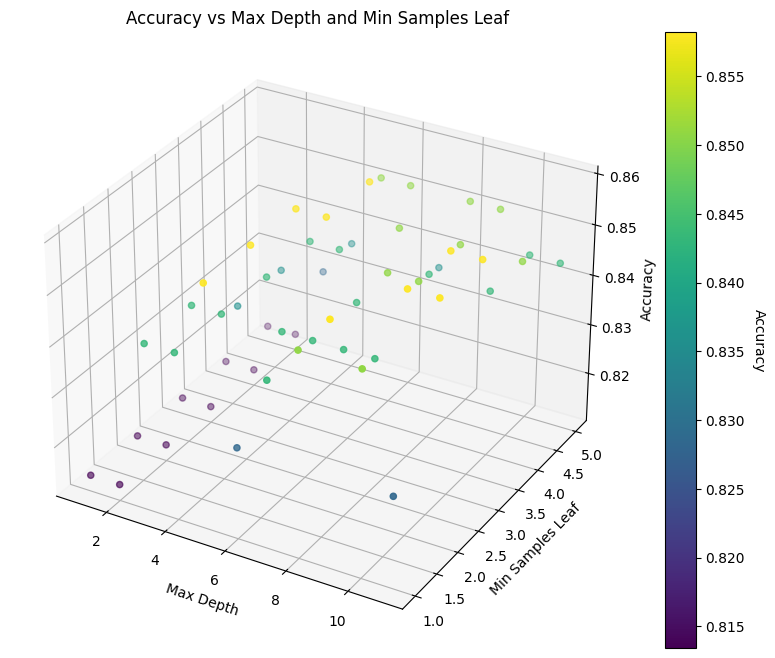

In [80]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data
scatter = ax.scatter(trees.depth, trees.leaf, trees.val_acc, c=trees.val_acc, cmap='viridis')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Leaf')
ax.set_zlabel('Accuracy')
ax.set_title('Accuracy vs Max Depth and Min Samples Leaf')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Accuracy', rotation=270, labelpad=15)

plt.show()